In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal" : (np.arange(N)//40 + np.arange(N) % 21 + np.random.randn(N))})


In [2]:
df_train.head(12)

,Date,Signal
0,2016-01-25,1.622436
1,2016-01-26,0.740364
2,2016-01-27,0.108167
3,2016-01-28,4.053286
4,2016-01-29,3.777288
5,2016-01-30,4.616664
6,2016-01-31,6.658790
7,2016-02-01,7.454922
8,2016-02-02,7.076113
9,2016-02-03,7.475658


In [3]:
df_train.tail(12)

,Date,Signal
348,2017-01-07,18.315997
349,2017-01-08,21.204743
350,2017-01-09,22.729842
351,2017-01-10,24.078514
352,2017-01-11,23.856608
353,2017-01-12,24.591991
354,2017-01-13,25.509640
355,2017-01-14,27.615992
356,2017-01-15,28.311436
357,2017-01-16,5.675243


<AxesSubplot:xlabel='Date'>

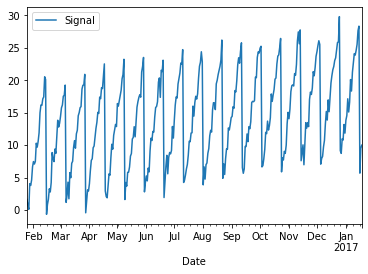

In [4]:
df_train.plot('Date' , ['Signal'])

In [5]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = 'Signal', iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.std:START_TRAINING 'Signal'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Signal']' 3.261080503463745
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2016-11-01T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Signal' Length=360  Min=-0.6665165737545199 Max=29.77473215606474  Mean=13.883229072738054 StdDev=6.8269459107154775
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Signal' Min=-0.6665165737545199 Max=29.77473215606474  Mean=13.883229072738054 StdDev=6.8269459107154775
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)' [ConstantTrend + NoCycle + AR]
INFO:pyaf.std:TREND_DETAIL '_Signal_ConstantTrend' [ConstantTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Signal_ConstantTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Signal_ConstantTrend_residue_zeroCycle_residue_AR

INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 1.9534156322479248


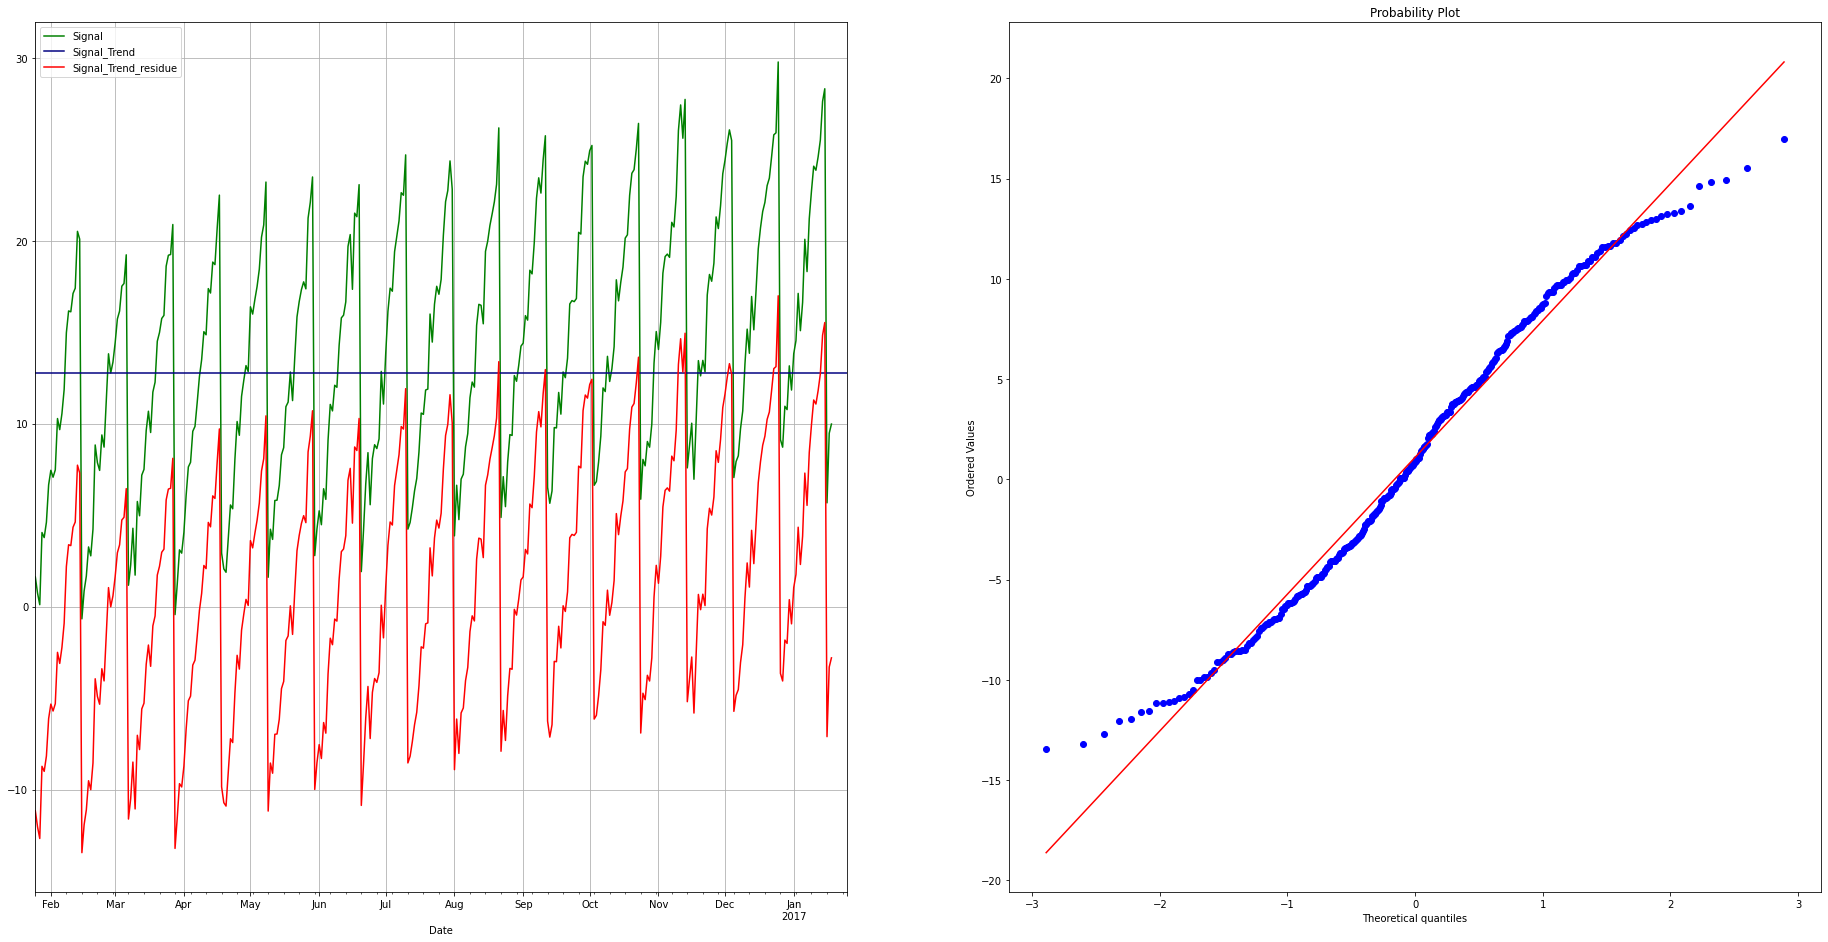

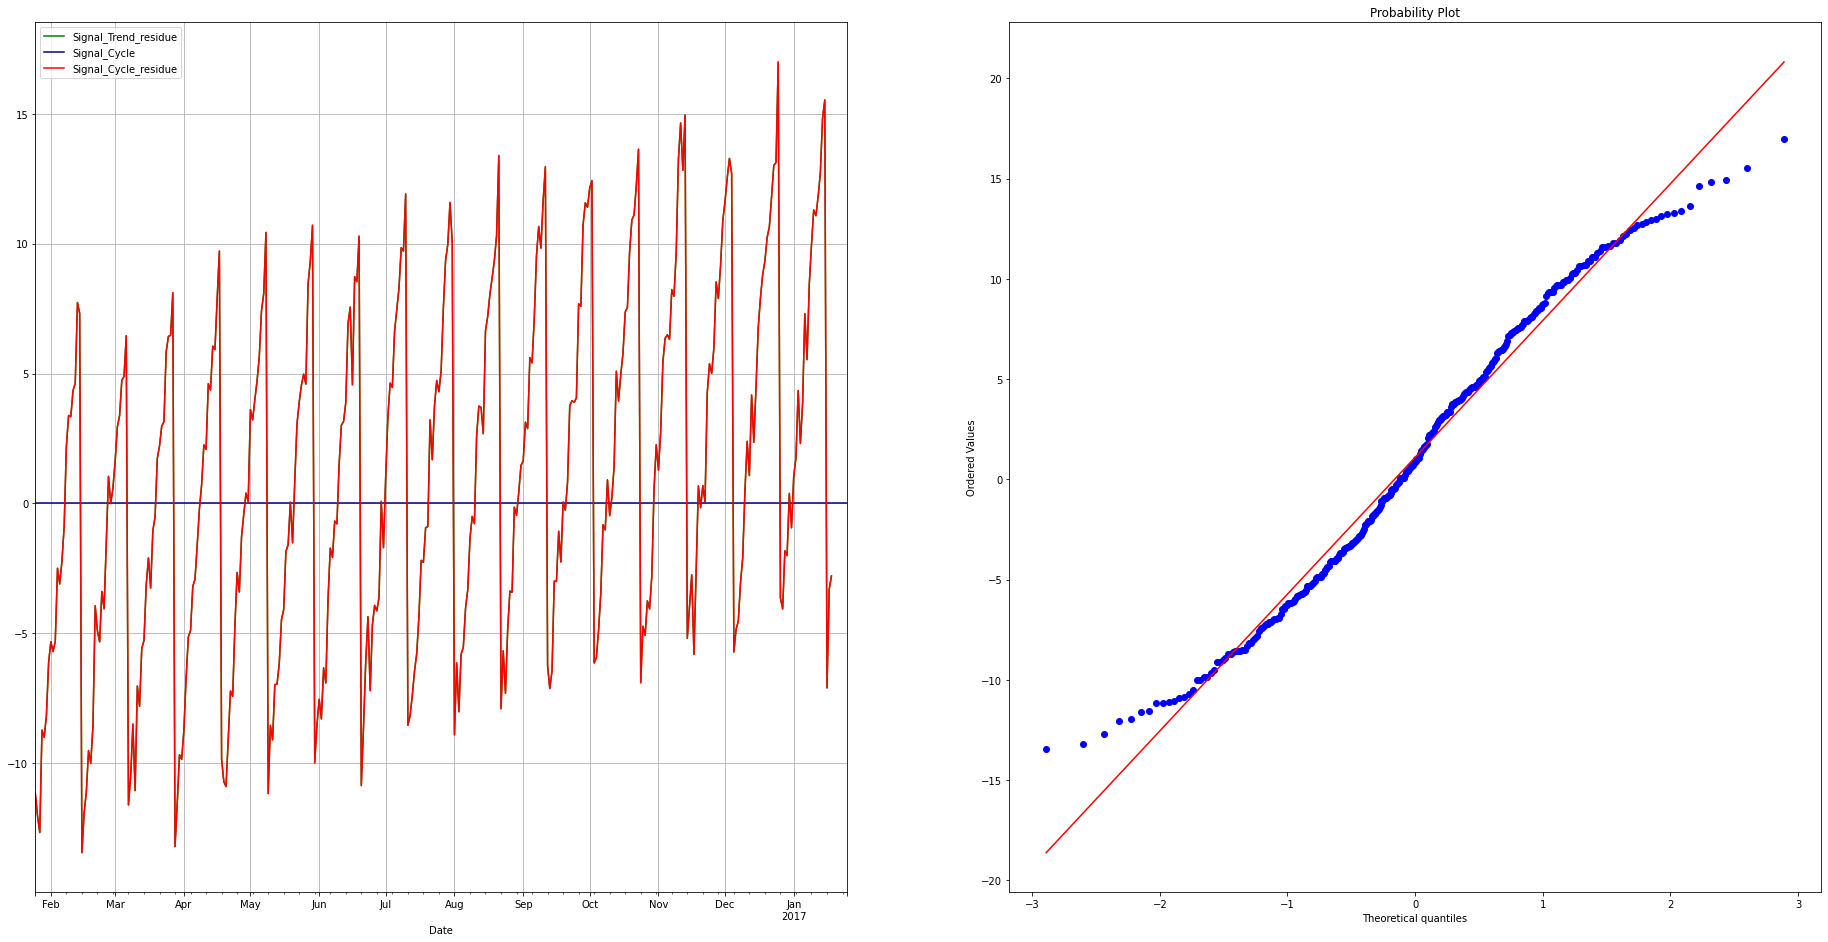

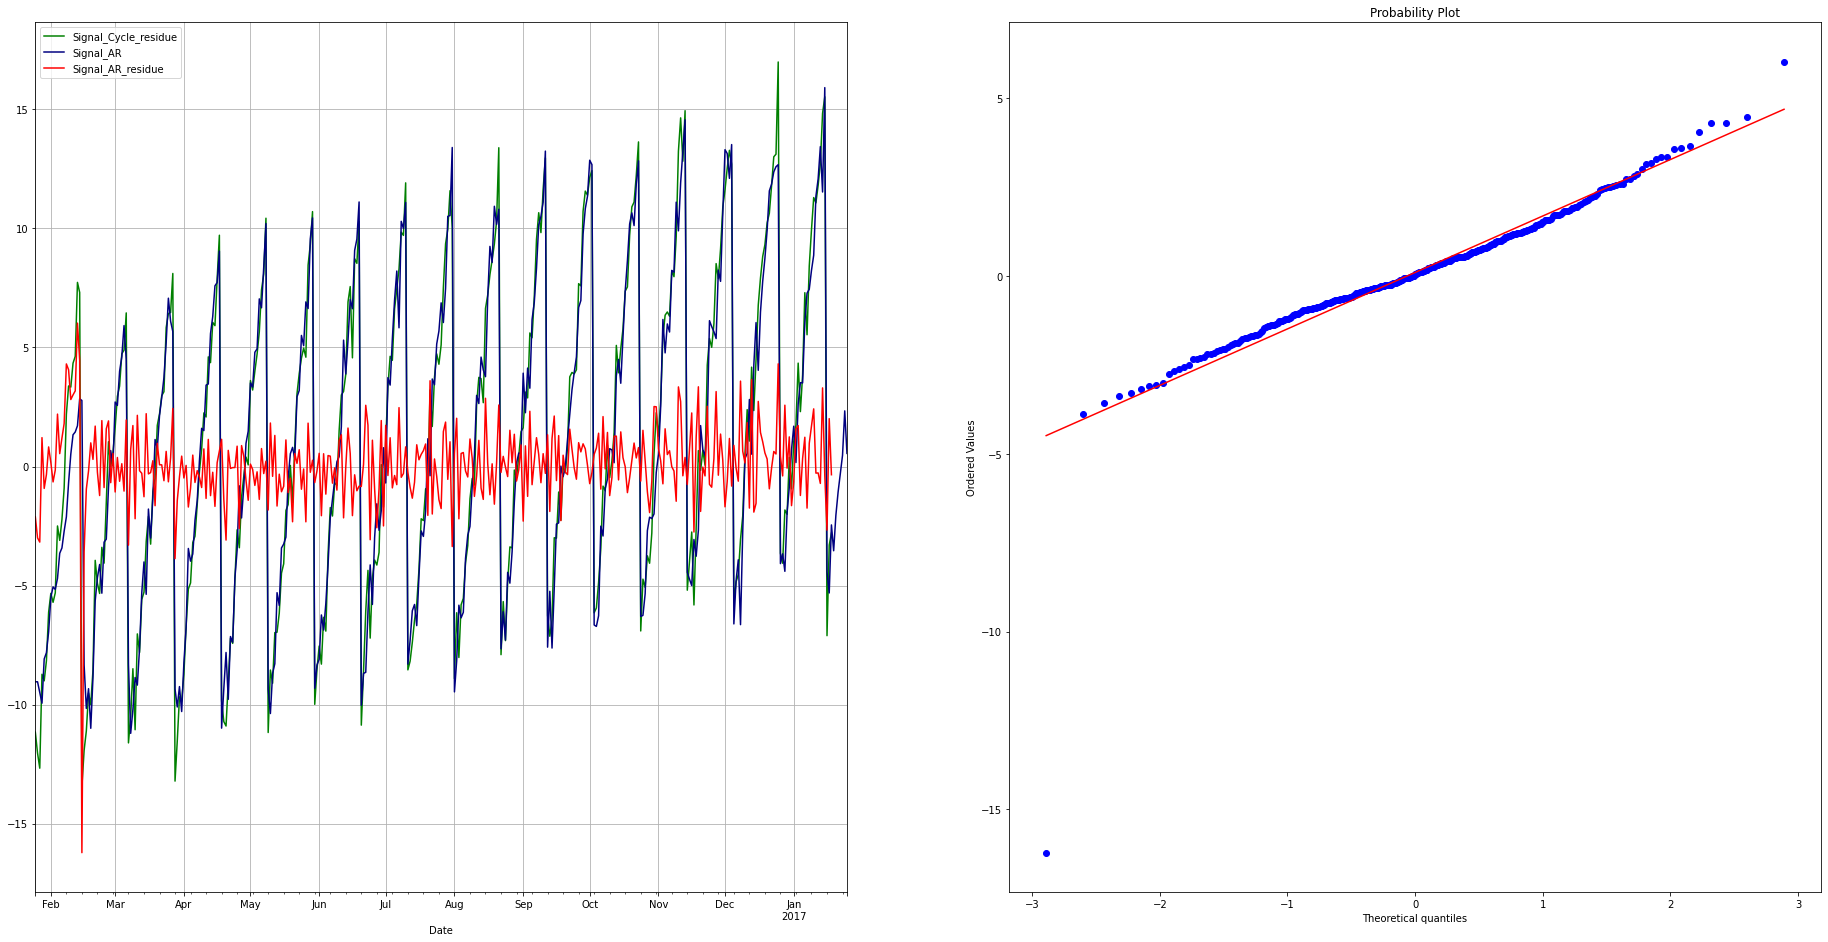

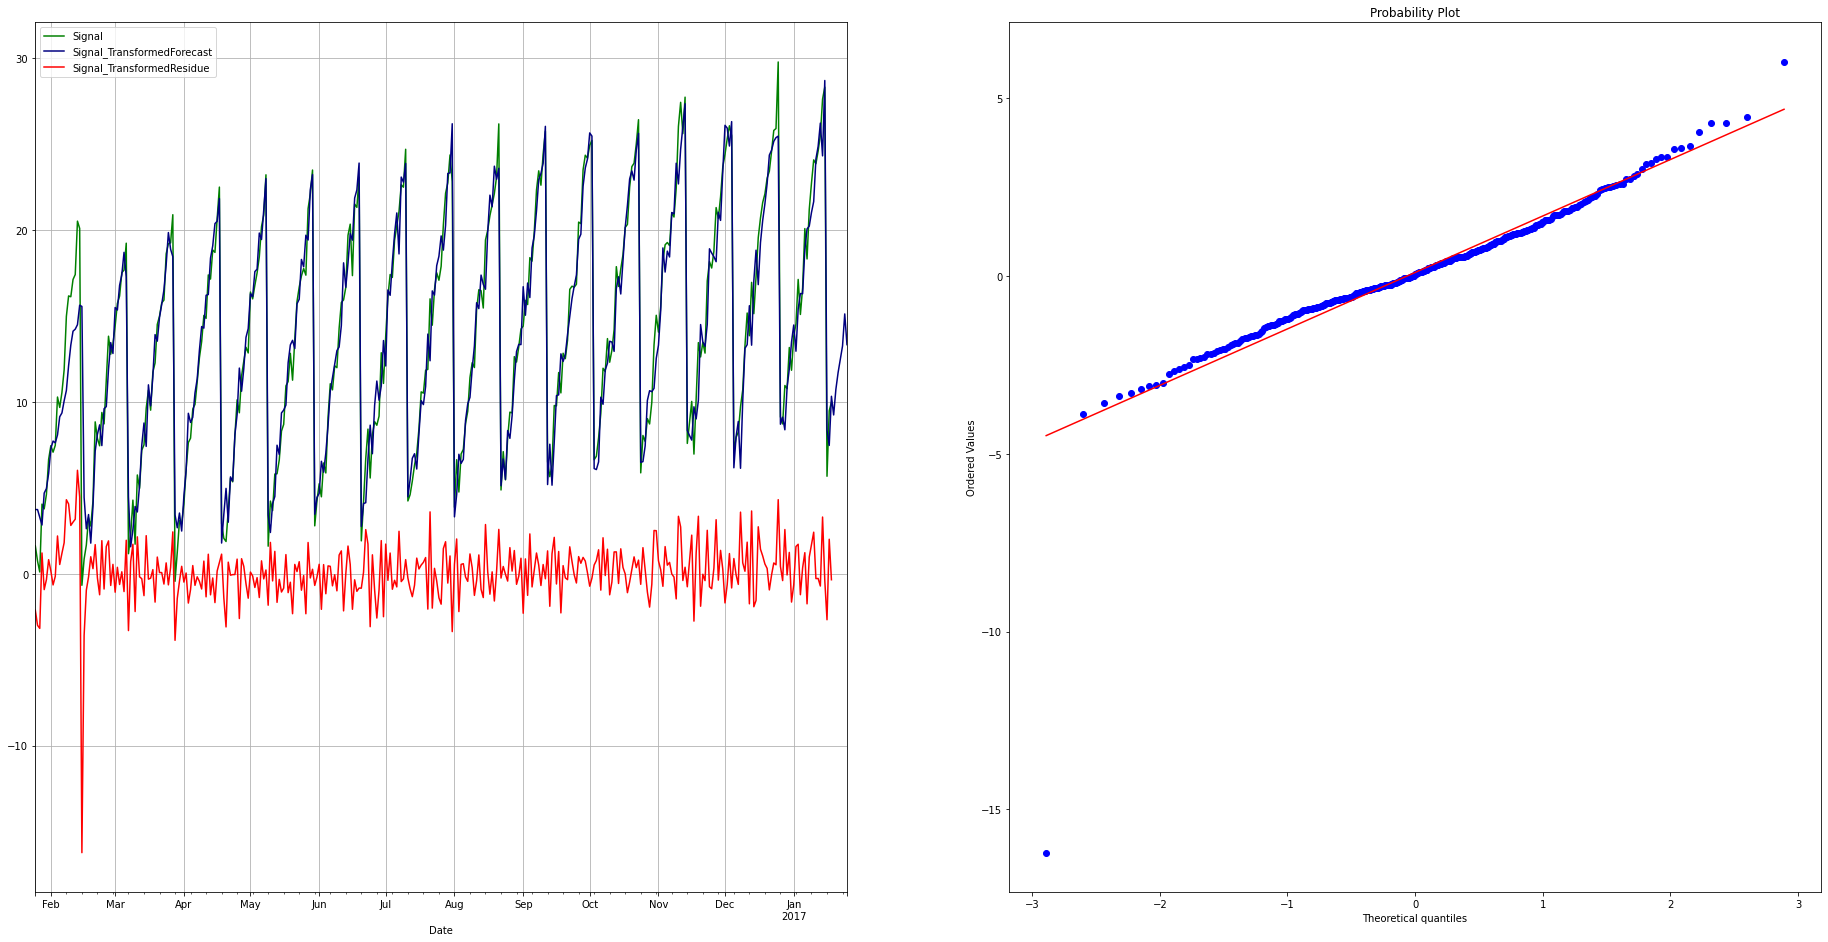

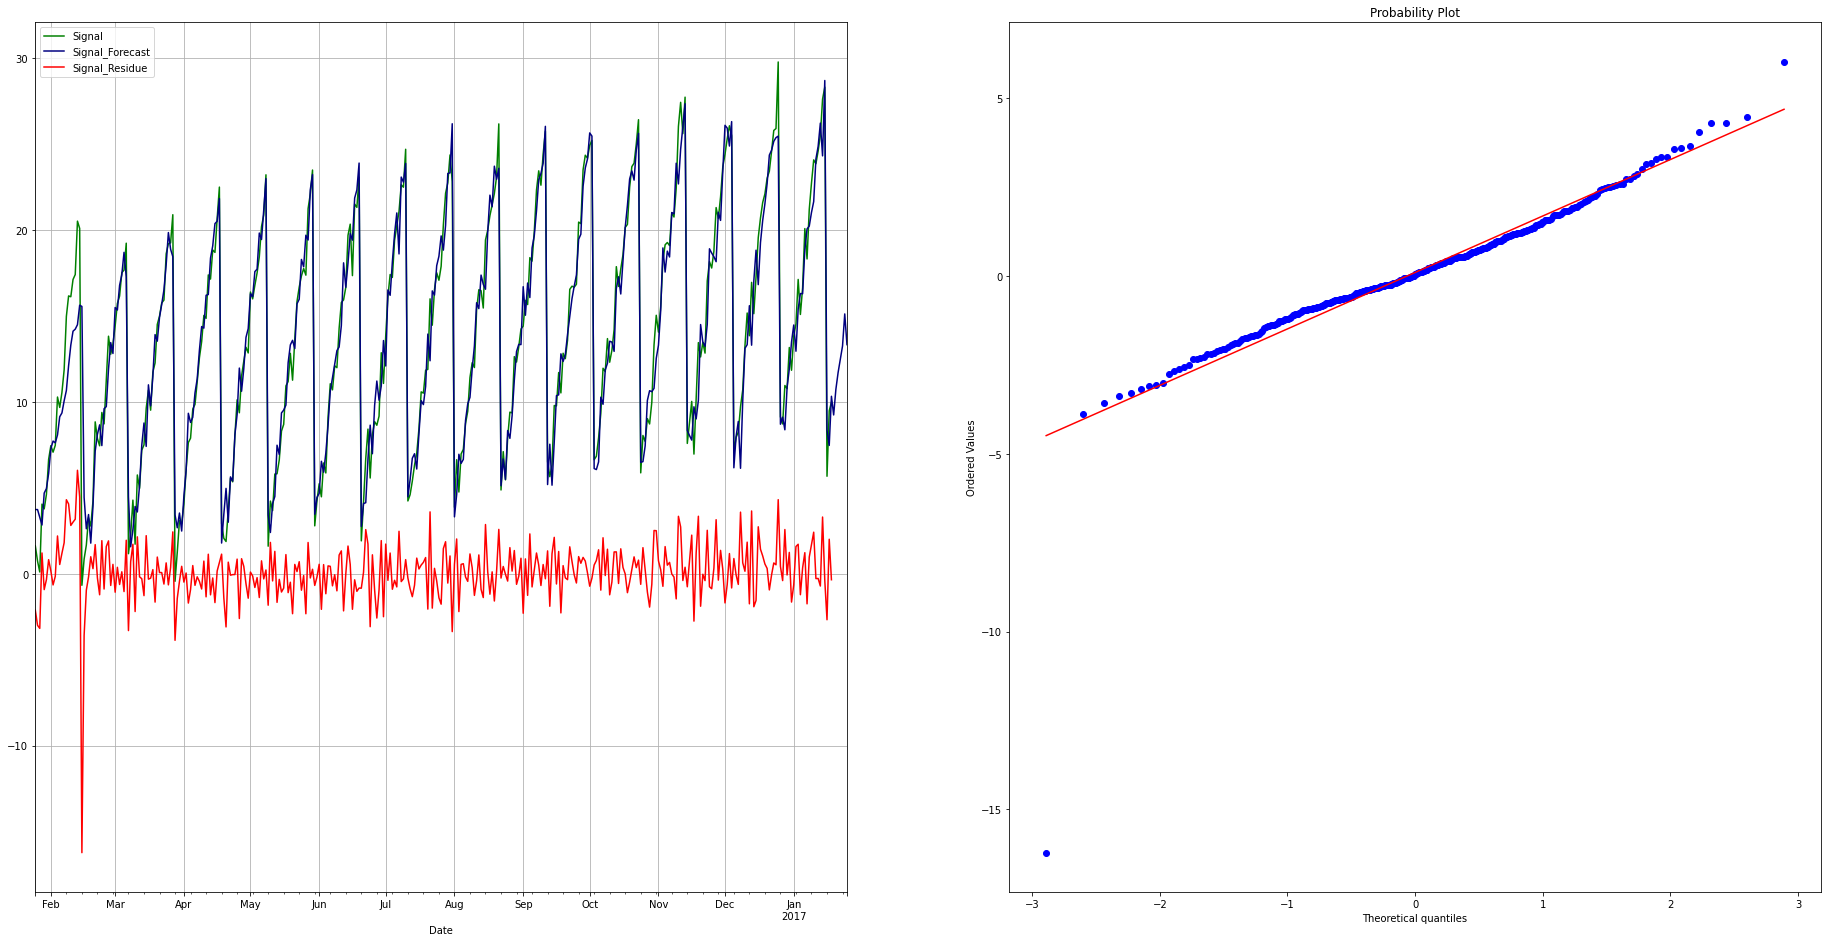

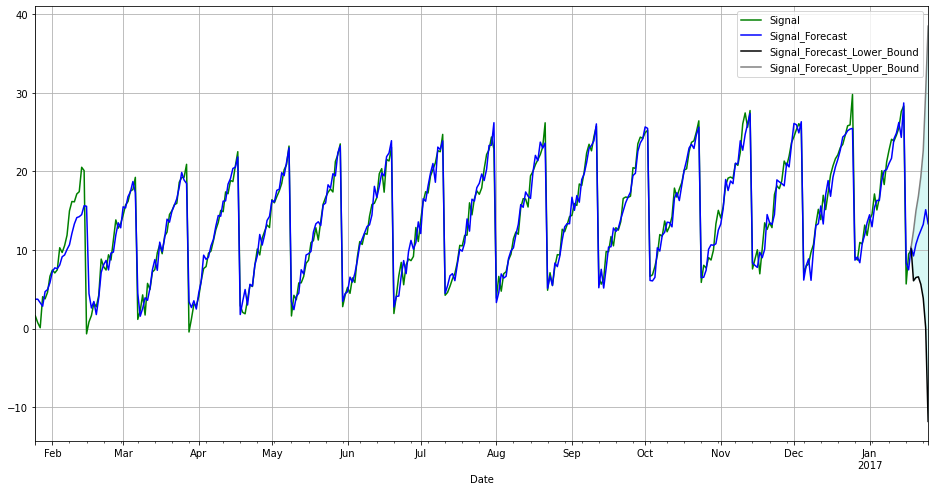

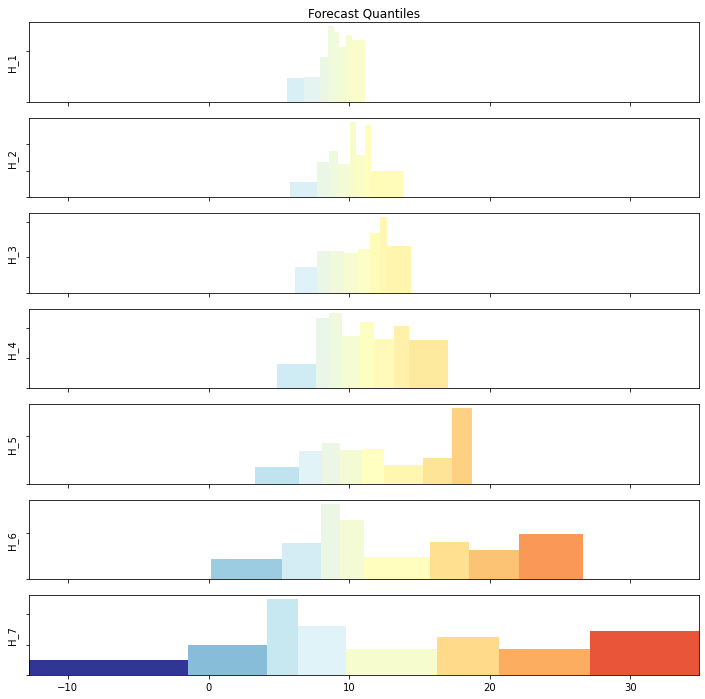

In [6]:
lEngine.standardPlots()

In [7]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
# Future dates : ['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000' '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000' '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000' '2017-01-25T00:00:00.000000000']
print(df_forecast['Date'].tail(7).values)

# signal forecast : [ 9.74934646  10.04419761  12.15136455  12.20369717  14.09607727 15.68086323  16.22296559]
print(df_forecast['Signal_Forecast'].tail(7).values)

INFO:pyaf.std:START_FORECASTING '['Signal']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Signal']' 0.3855571746826172


Index(['Date', 'Signal', 'row_number', 'Date_Normalized', '_Signal',
       '_Signal_ConstantTrend', '_Signal_ConstantTrend_residue',
       '_Signal_ConstantTrend_residue_zeroCycle',
       '_Signal_ConstantTrend_residue_zeroCycle_residue',
       '_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)',
       '_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)_residue',
       '_Signal_Trend', '_Signal_Trend_residue', '_Signal_Cycle',
       '_Signal_Cycle_residue', '_Signal_AR', '_Signal_AR_residue',
       '_Signal_TransformedForecast', 'Signal_Forecast',
       '_Signal_TransformedResidue', 'Signal_Residue',
       'Signal_Forecast_Lower_Bound', 'Signal_Forecast_Upper_Bound',
       'Signal_Forecast_Quantile_2', 'Signal_Forecast_Quantile_14',
       'Signal_Forecast_Quantile_26', 'Signal_Forecast_Quantile_38',
       'Signal_Forecast_Quantile_50', 'Signal_Forecast_Quantile_62',
       'Signal_Forecast_Quantile_74', 'Signal_Forecast_Quantile_86',
       'Signal_Forecast_Quanti

In [8]:
import pickle

In [9]:
lEngine_str = pickle.dumps(lEngine)

In [10]:
lEngine_reloaded = pickle.loads(lEngine_str)

In [11]:
df_forecast_aftrer_reload = lEngine_reloaded.forecast(iInputDS = df_train, iHorizon = 7)

INFO:pyaf.std:START_FORECASTING '['Signal']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Signal']' 0.37644147872924805


In [12]:
df_forecast_aftrer_reload

,Date,Signal,row_number,Date_Normalized,_Signal,_Signal_ConstantTrend,_Signal_ConstantTrend_residue,_Signal_ConstantTrend_residue_zeroCycle,_Signal_ConstantTrend_residue_zeroCycle_residue,_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64),...,Signal_Forecast_Upper_Bound,Signal_Forecast_Quantile_2,Signal_Forecast_Quantile_14,Signal_Forecast_Quantile_26,Signal_Forecast_Quantile_38,Signal_Forecast_Quantile_50,Signal_Forecast_Quantile_62,Signal_Forecast_Quantile_74,Signal_Forecast_Quantile_86,Signal_Forecast_Quantile_98
0,2016-01-25,1.622436,0,0.000000,1.622436,12.780596,-11.158160,0.0,-11.158160,-9.042724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-26,0.740364,1,0.003559,0.740364,12.780596,-12.040231,0.0,-12.040231,-9.042724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-27,0.108167,2,0.007117,0.108167,12.780596,-12.672429,0.0,-12.672429,-9.498212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-28,4.053286,3,0.010676,4.053286,12.780596,-8.727310,0.0,-8.727310,-9.940576,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-29,3.777288,4,0.014235,3.777288,12.780596,-9.003308,0.0,-9.003308,-8.084155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2017-01-21,NaN,362,1.288256,NaN,12.780596,NaN,0.0,NaN,-1.077048,...,16.823133,6.187012,7.725425,8.674305,9.630342,10.615462,11.513659,12.174068,12.697690,14.377982
363,2017-01-22,NaN,363,1.291815,NaN,12.780596,NaN,0.0,NaN,-0.309928,...,19.302603,4.890211,7.632004,8.592795,9.486083,10.788836,11.800658,13.160761,14.240970,17.014325
364,2017-01-23,NaN,364,1.295374,NaN,12.780596,NaN,0.0,NaN,0.471176,...,22.640509,3.306908,6.464736,8.057853,9.345917,10.921644,12.447903,15.280472,17.338884,18.732459
365,2017-01-24,NaN,365,1.298932,NaN,12.780596,NaN,0.0,NaN,2.337337,...,30.149298,0.156507,5.202211,8.000734,9.356881,11.081415,15.747165,18.501794,22.053307,26.606028


INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 1.918273687362671


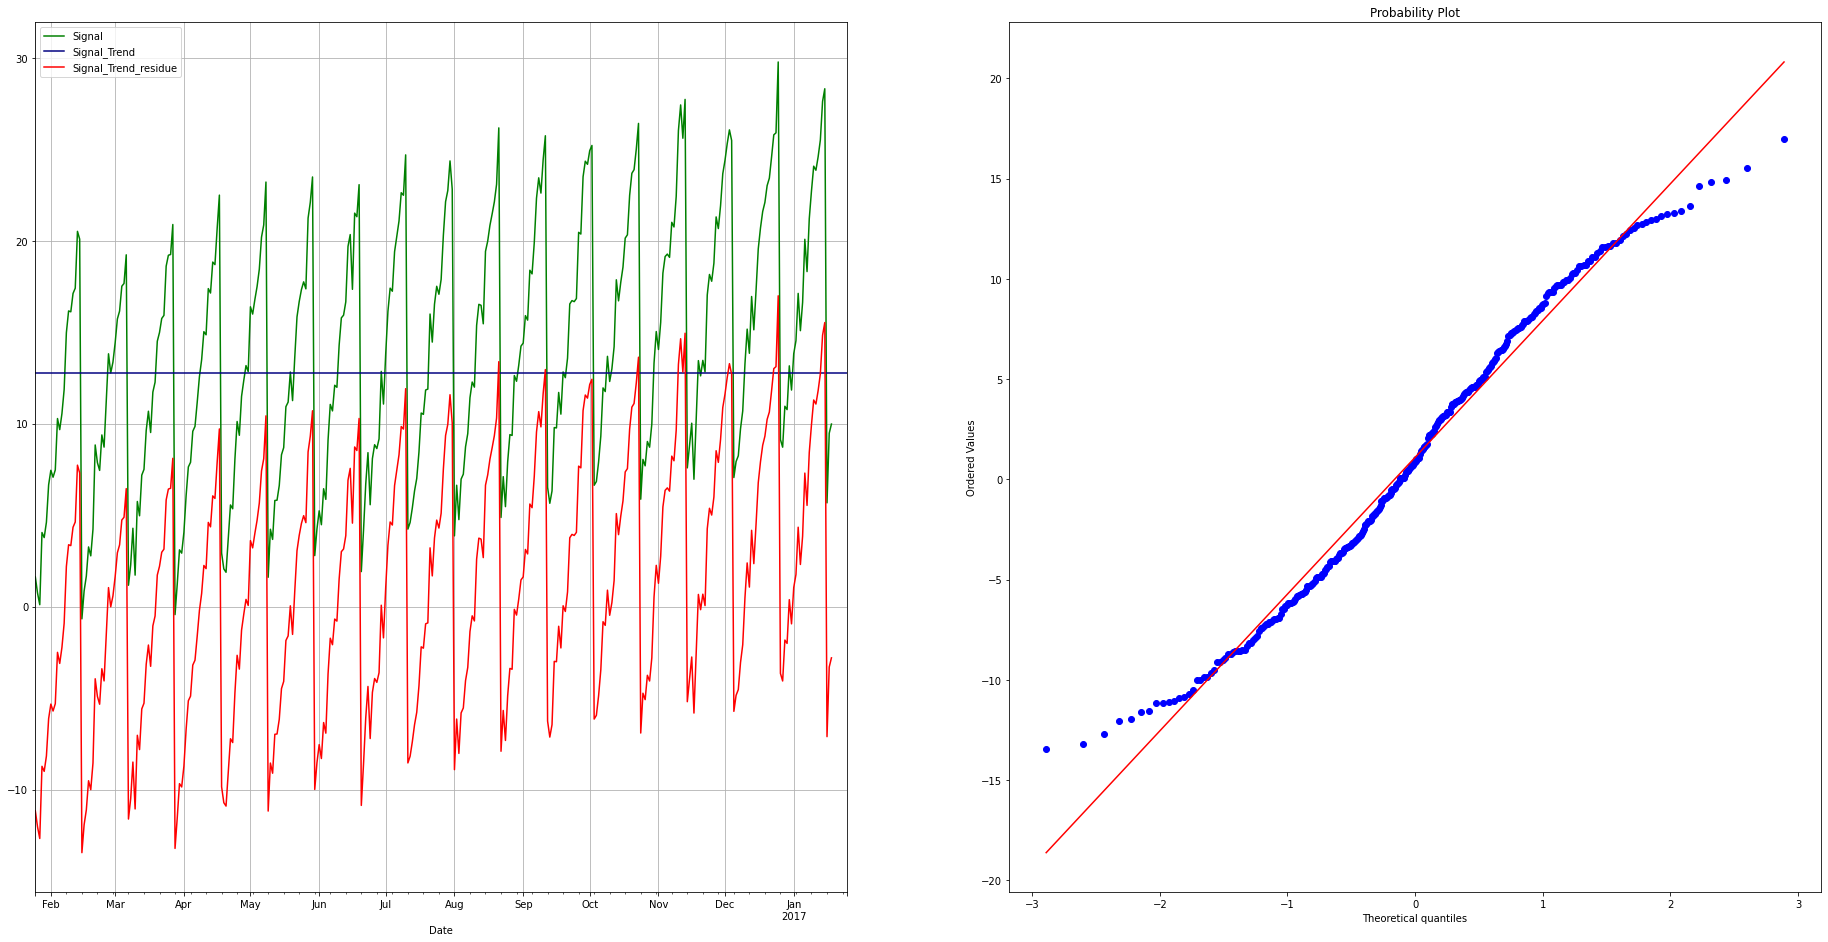

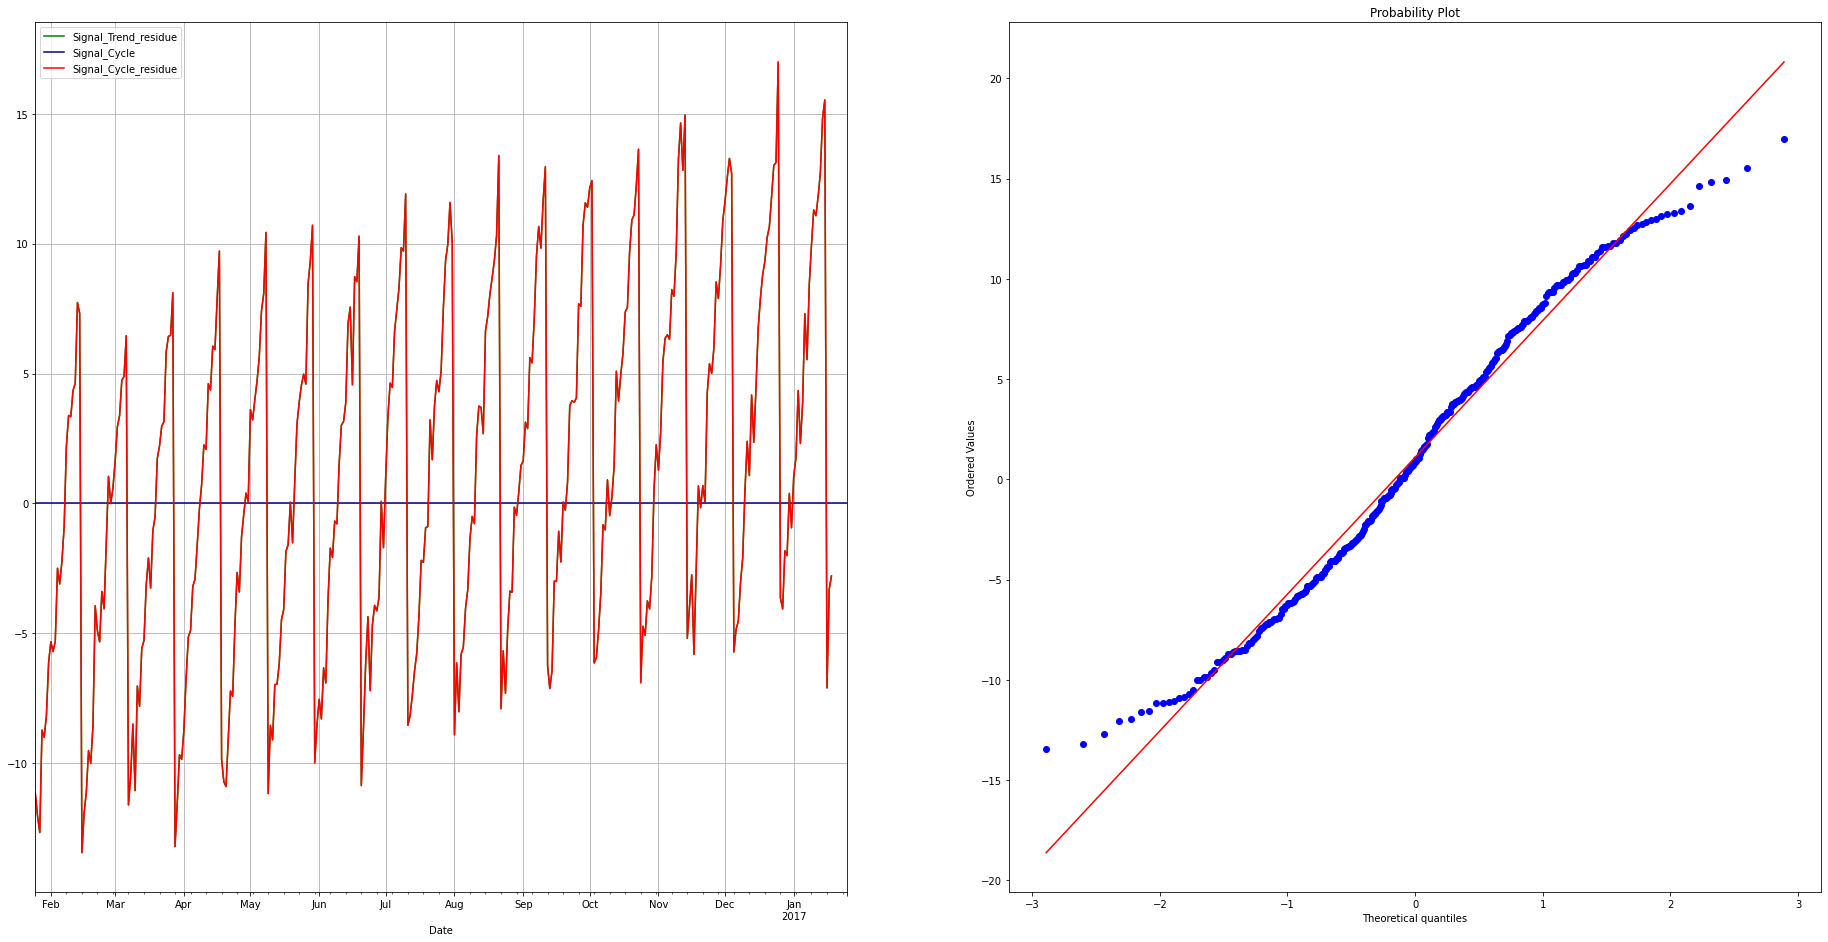

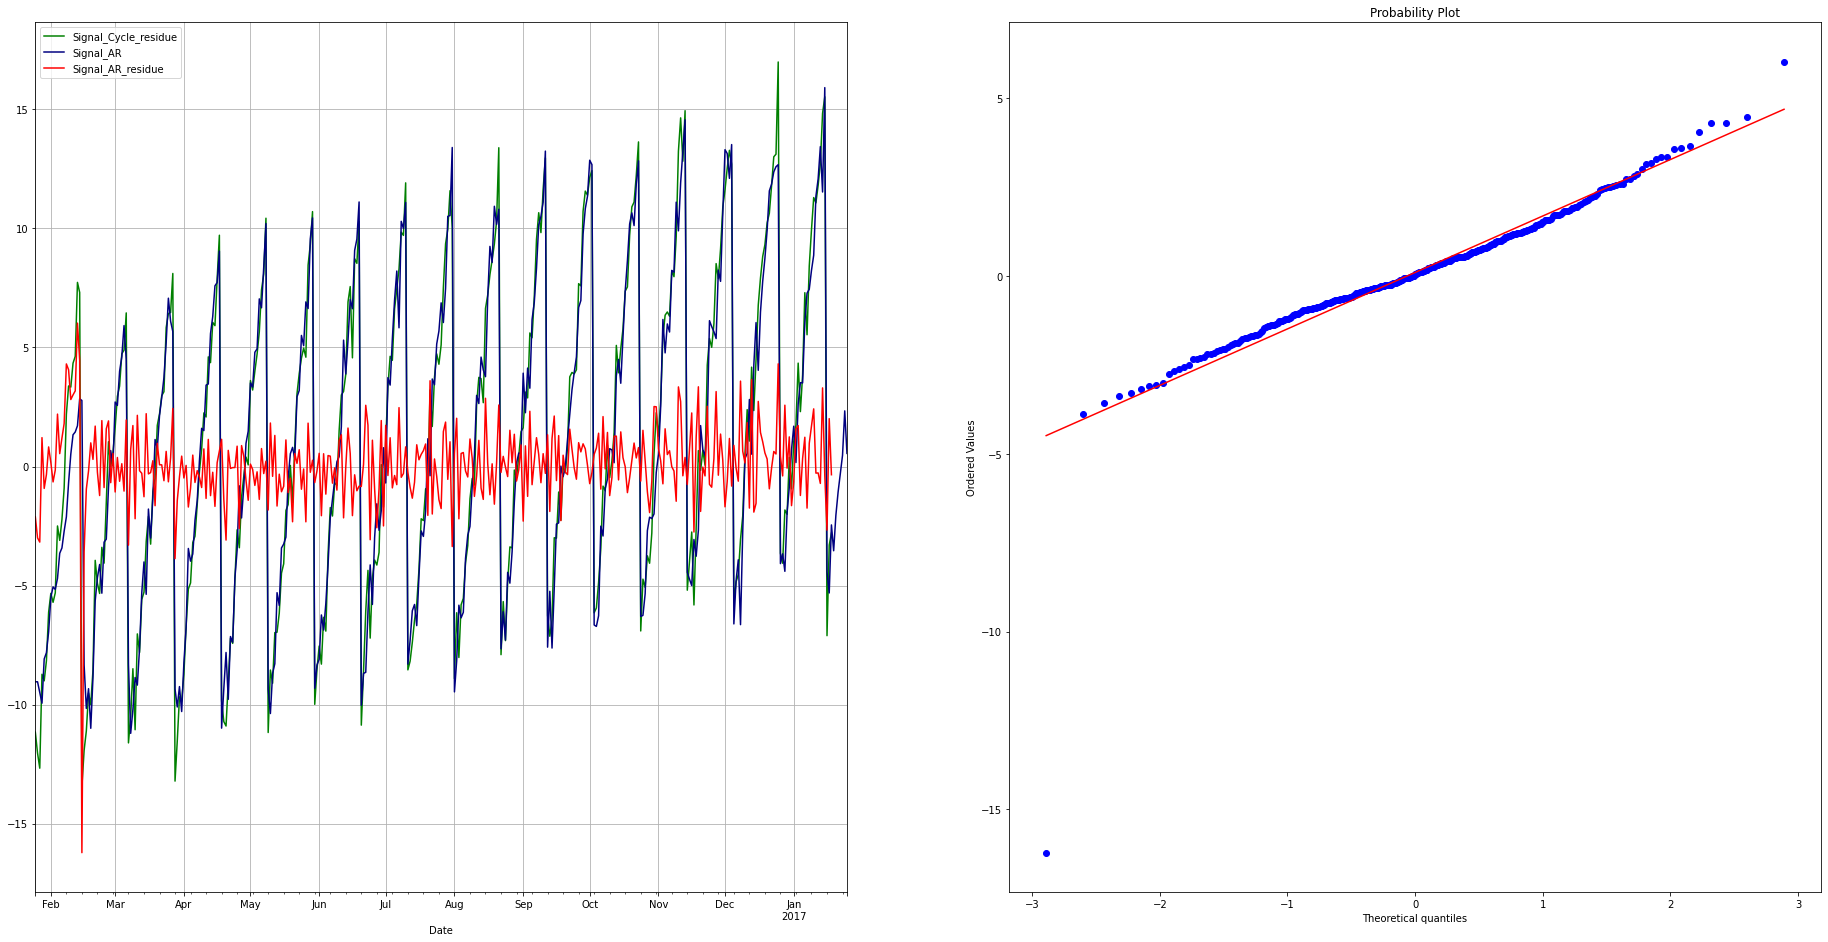

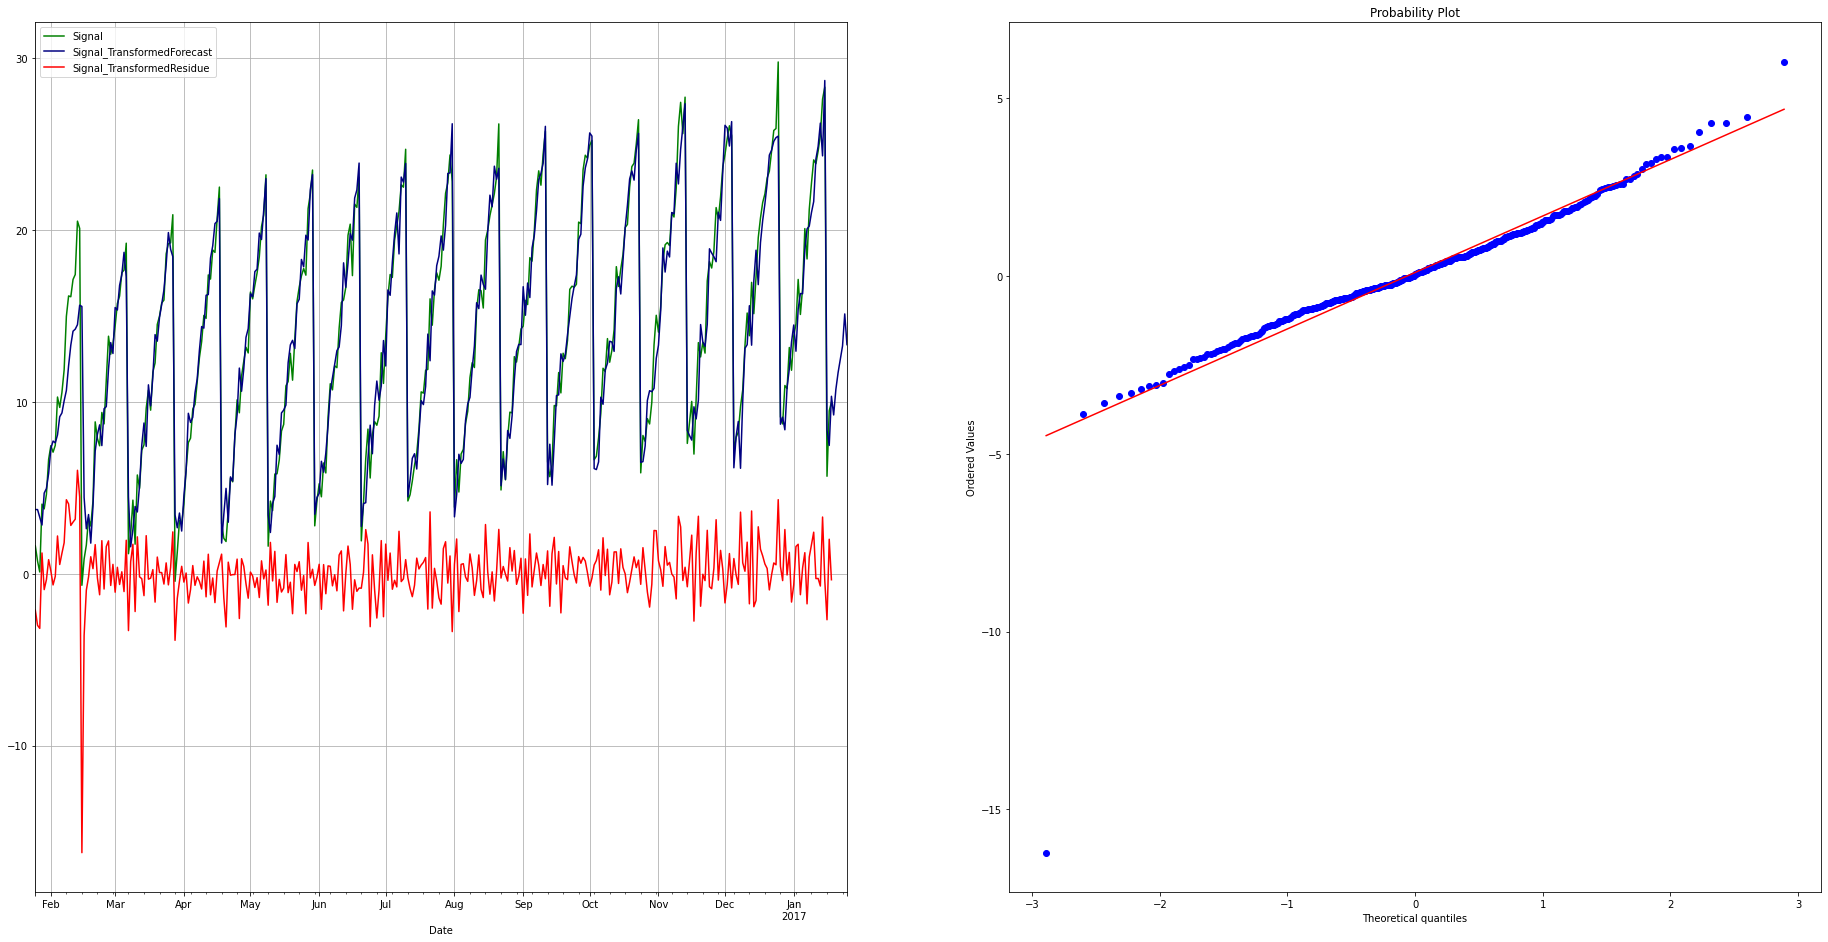

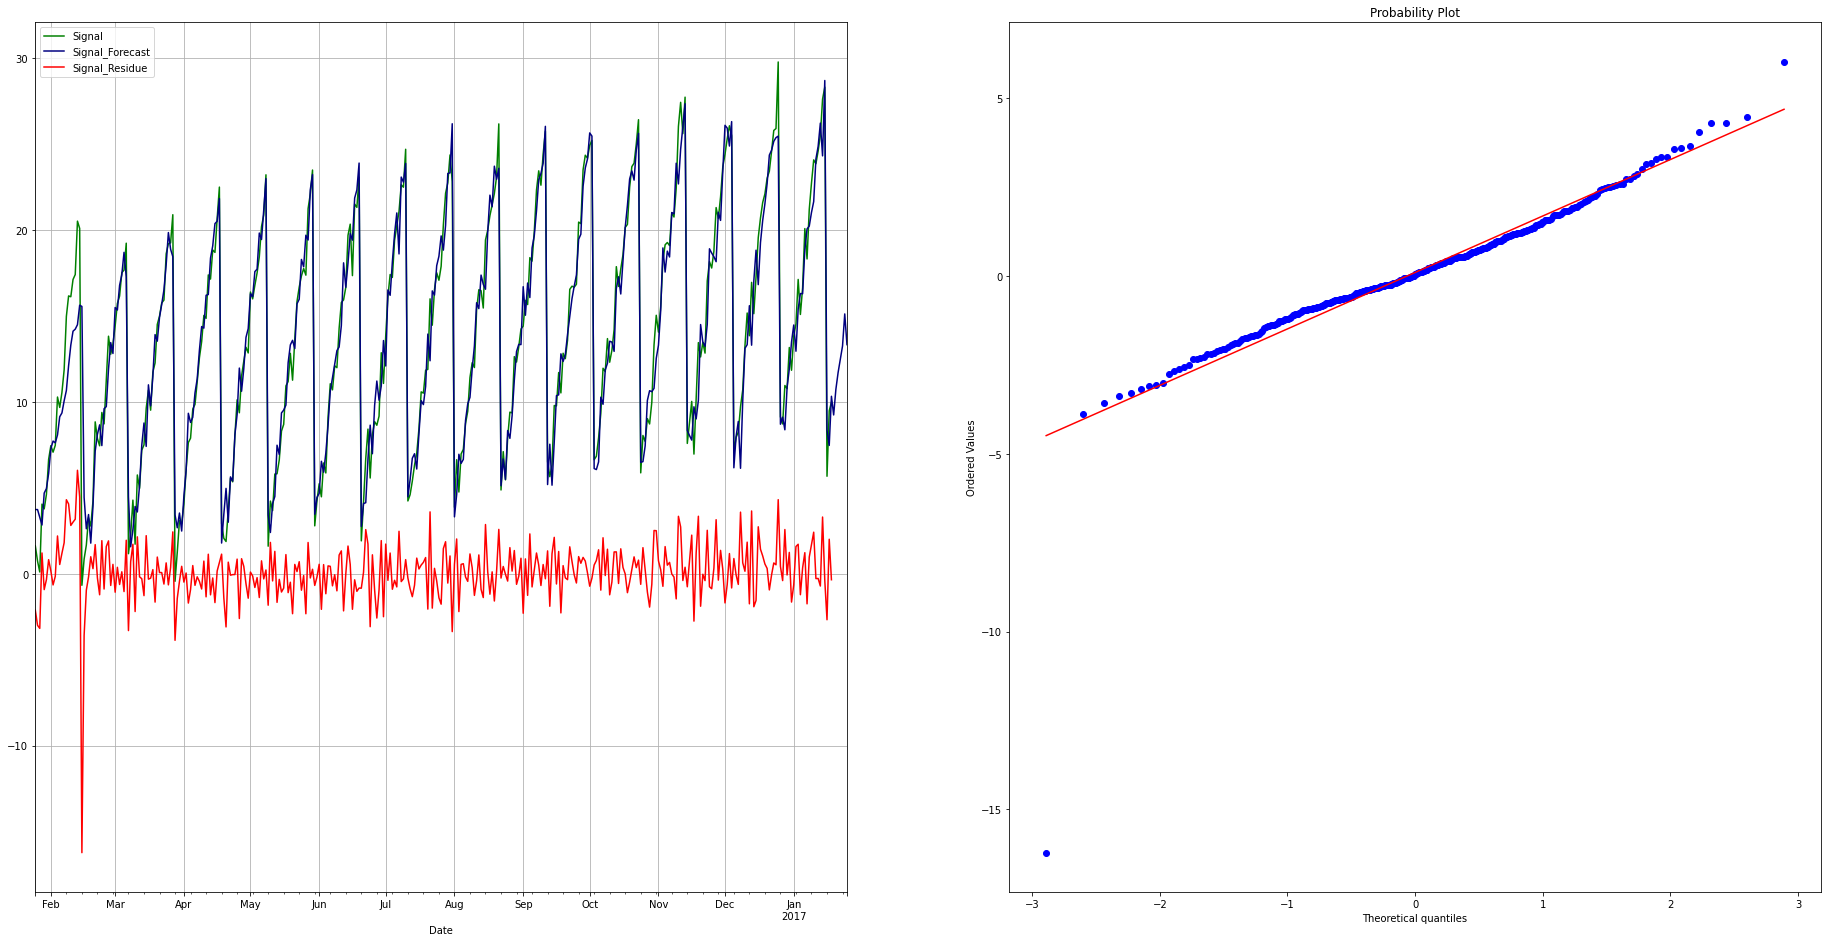

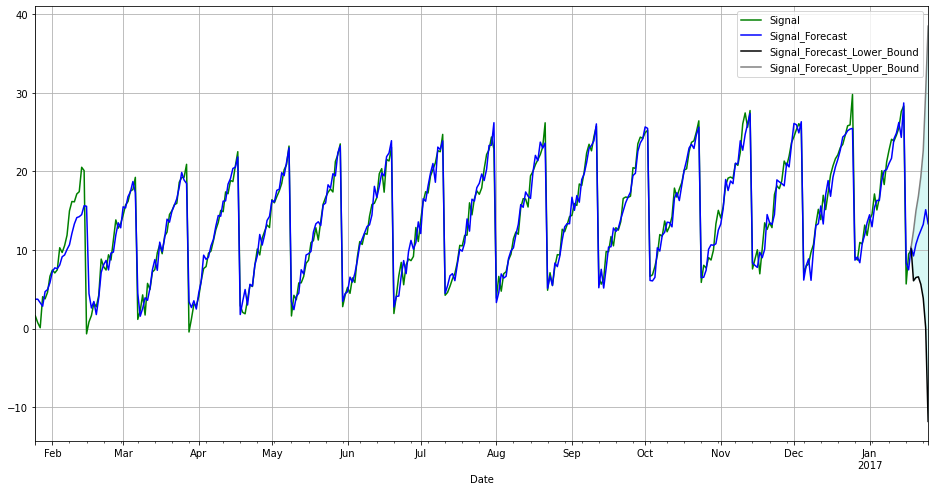

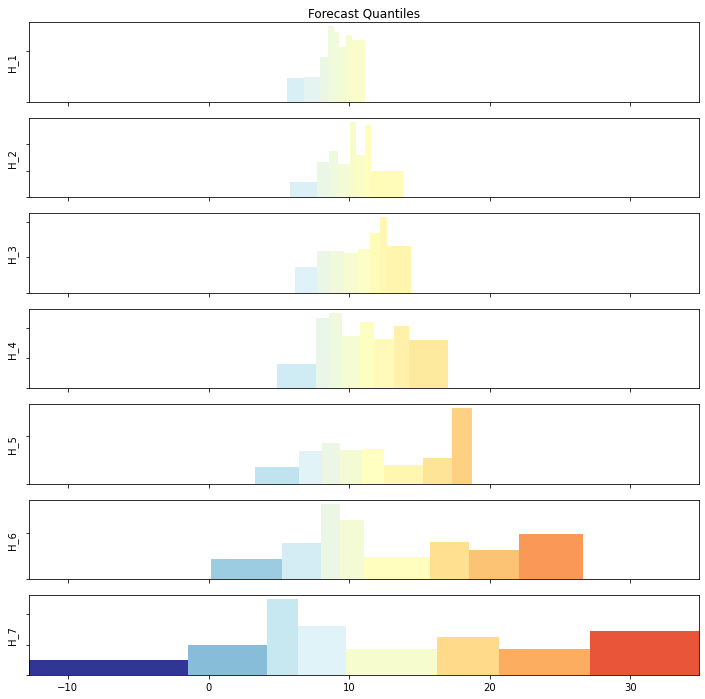

In [13]:
lEngine_reloaded.standardPlots()

In [14]:
df_forecast.describe()

,Signal,row_number,Date_Normalized,_Signal,_Signal_ConstantTrend,_Signal_ConstantTrend_residue,_Signal_ConstantTrend_residue_zeroCycle,_Signal_ConstantTrend_residue_zeroCycle_residue,_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64),_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)_residue,...,Signal_Forecast_Upper_Bound,Signal_Forecast_Quantile_2,Signal_Forecast_Quantile_14,Signal_Forecast_Quantile_26,Signal_Forecast_Quantile_38,Signal_Forecast_Quantile_50,Signal_Forecast_Quantile_62,Signal_Forecast_Quantile_74,Signal_Forecast_Quantile_86,Signal_Forecast_Quantile_98
count,360.000000,367.000000,367.000000,360.000000,3.670000e+02,360.000000,367.0,360.000000,367.000000,360.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,13.883229,183.000000,0.651246,13.883229,1.278060e+01,1.102633,0.0,1.102633,0.971461,0.102235,...,22.107151,1.886193,5.723944,7.701495,8.839876,10.305775,12.508353,14.394352,16.466814,19.505694
std,6.836448,106.088014,0.377537,6.836448,4.980589e-14,6.836448,0.0,6.836448,6.527705,1.707013,...,9.252390,6.785870,3.305537,1.605437,1.154384,0.778905,2.602439,3.977925,6.161897,8.384884
min,-0.666517,0.000000,0.000000,-0.666517,1.278060e+01,-13.447112,0.0,-13.447112,-11.208718,-16.221008,...,12.405397,-12.759013,-1.482036,4.131340,6.346884,8.900191,9.302983,9.813568,10.234835,11.145333
25%,8.596064,91.500000,0.325623,8.596064,1.278060e+01,-4.184532,0.0,-4.184532,-4.272633,-0.749875,...,15.891845,1.731707,5.833474,7.951888,8.856514,9.916440,10.990662,11.666777,12.131901,14.088933
50%,13.666685,183.000000,0.651246,13.666685,1.278060e+01,0.886089,0.0,0.886089,0.550642,0.047228,...,19.302603,4.890211,6.798652,8.057853,9.345917,10.615462,11.800658,13.160761,14.240970,17.014325
75%,19.237770,274.500000,0.976868,19.237770,1.278060e+01,6.457174,0.0,6.457174,6.047138,0.995716,...,26.394904,5.710862,7.678714,8.571594,9.421482,10.855240,14.097534,16.891133,19.696095,22.669244
max,29.774732,366.000000,1.302491,29.774732,1.278060e+01,16.994136,0.0,16.994136,15.916809,6.023349,...,38.468557,6.187012,7.726617,8.674305,9.630342,11.081415,16.278436,20.670315,27.135898,34.863845


In [15]:
df_forecast_aftrer_reload.describe()

,Signal,row_number,Date_Normalized,_Signal,_Signal_ConstantTrend,_Signal_ConstantTrend_residue,_Signal_ConstantTrend_residue_zeroCycle,_Signal_ConstantTrend_residue_zeroCycle_residue,_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64),_Signal_ConstantTrend_residue_zeroCycle_residue_AR(64)_residue,...,Signal_Forecast_Upper_Bound,Signal_Forecast_Quantile_2,Signal_Forecast_Quantile_14,Signal_Forecast_Quantile_26,Signal_Forecast_Quantile_38,Signal_Forecast_Quantile_50,Signal_Forecast_Quantile_62,Signal_Forecast_Quantile_74,Signal_Forecast_Quantile_86,Signal_Forecast_Quantile_98
count,360.000000,367.000000,367.000000,360.000000,3.670000e+02,360.000000,367.0,360.000000,367.000000,360.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,13.883229,183.000000,0.651246,13.883229,1.278060e+01,1.102633,0.0,1.102633,0.971461,0.102235,...,22.107151,1.886193,5.723944,7.701495,8.839876,10.305775,12.508353,14.394352,16.466814,19.505694
std,6.836448,106.088014,0.377537,6.836448,4.980589e-14,6.836448,0.0,6.836448,6.527705,1.707013,...,9.252390,6.785870,3.305537,1.605437,1.154384,0.778905,2.602439,3.977925,6.161897,8.384884
min,-0.666517,0.000000,0.000000,-0.666517,1.278060e+01,-13.447112,0.0,-13.447112,-11.208718,-16.221008,...,12.405397,-12.759013,-1.482036,4.131340,6.346884,8.900191,9.302983,9.813568,10.234835,11.145333
25%,8.596064,91.500000,0.325623,8.596064,1.278060e+01,-4.184532,0.0,-4.184532,-4.272633,-0.749875,...,15.891845,1.731707,5.833474,7.951888,8.856514,9.916440,10.990662,11.666777,12.131901,14.088933
50%,13.666685,183.000000,0.651246,13.666685,1.278060e+01,0.886089,0.0,0.886089,0.550642,0.047228,...,19.302603,4.890211,6.798652,8.057853,9.345917,10.615462,11.800658,13.160761,14.240970,17.014325
75%,19.237770,274.500000,0.976868,19.237770,1.278060e+01,6.457174,0.0,6.457174,6.047138,0.995716,...,26.394904,5.710862,7.678714,8.571594,9.421482,10.855240,14.097534,16.891133,19.696095,22.669244
max,29.774732,366.000000,1.302491,29.774732,1.278060e+01,16.994136,0.0,16.994136,15.916809,6.023349,...,38.468557,6.187012,7.726617,8.674305,9.630342,11.081415,16.278436,20.670315,27.135898,34.863845
